In [1]:

import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
df = pd.read_csv('data/CollegeMsgClustered.csv')

In [3]:
import networkx as nx

def create_graph_for_bucket(bucket_id):
    # Filter data for specific bucket
    bucket_data = df[df['bucket_id'] == bucket_id]
    
    # Create a directed graph
    G = nx.DiGraph()
    
    for _, row in bucket_data.iterrows():
        src = row['src_id']
        dst = row['dst_id']
        G.add_node(src, cluster=row['src_cluster'])
        G.add_node(dst, cluster=row['dst_cluster'])
        G.add_edge(src, dst)
    
    return G

graphs = {bucket_id: create_graph_for_bucket(bucket_id) for bucket_id in df['bucket_id'].unique()}


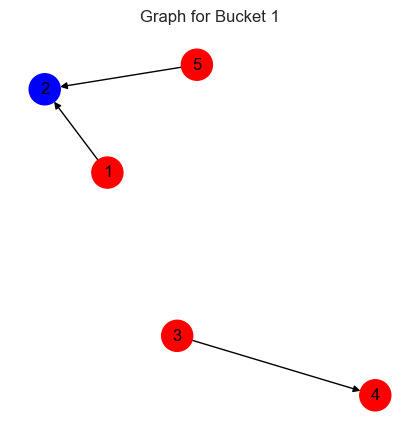

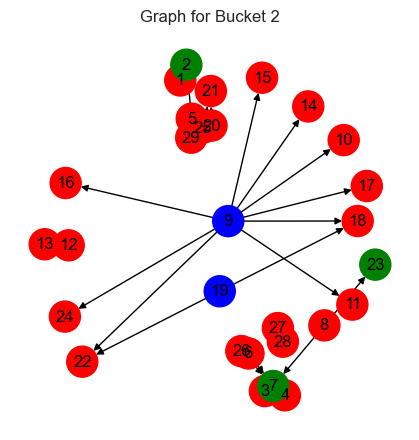

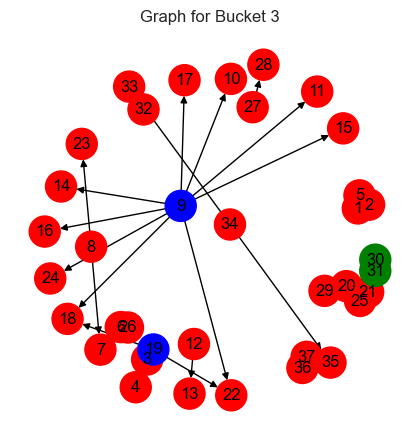

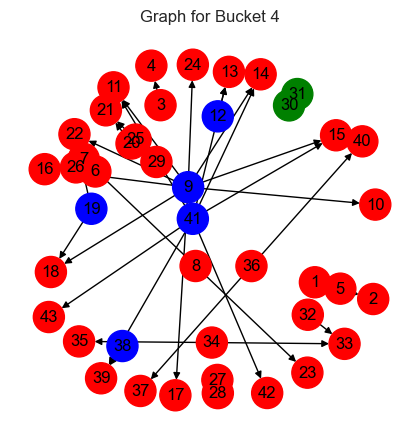

In [7]:
for bucket_id, graph in graphs.items():
    if bucket_id == 5:
        break
    plt.figure(figsize=(4, 4))
    pos = nx.spring_layout(graph)
    
    # Define colors for each cluster
    color_map = {0: 'red', 1: 'blue', 2: 'green'}
    
    # Get node colors based on their cluster
    node_colors = [color_map[data['cluster']] for _, data in graph.nodes(data=True)]
    
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color=node_colors)
    
    plt.title(f"Graph for Bucket {bucket_id}")
    plt.show()

In [8]:
for bucket_id, graph in graphs.items():
    print(graph.nodes)

[1, 2, 5, 3, 4]
[1, 2, 5, 3, 4, 6, 7, 8, 26, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 18, 25, 21, 20, 22, 23, 24, 29, 27, 28]
[5, 2, 1, 3, 4, 6, 7, 8, 26, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 18, 25, 21, 20, 22, 23, 24, 29, 27, 28, 30, 31, 34, 33, 32, 35, 36, 37]
[5, 2, 1, 3, 4, 26, 7, 6, 8, 9, 10, 41, 11, 13, 12, 14, 15, 16, 17, 19, 18, 25, 21, 20, 22, 23, 24, 29, 27, 28, 30, 31, 34, 33, 32, 35, 36, 37, 39, 38, 40, 42, 43]
[19, 22, 18, 34, 35, 33, 29, 25, 30, 31, 51, 58, 36, 56, 32, 60, 55, 50, 40, 37, 1, 2, 12, 13, 9, 49, 16, 15, 17, 10, 11, 24, 14, 20, 21, 38, 39, 41, 42, 43, 57, 61, 47, 46, 53, 54, 48, 52, 59, 27, 28, 62, 6, 7, 3, 4, 8, 23, 44, 45, 26, 5]
[19, 85, 64, 82, 8, 72, 52, 58, 22, 18, 34, 35, 33, 71, 74, 73, 90, 56, 12, 66, 32, 13, 38, 39, 20, 21, 63, 79, 94, 84, 41, 80, 76, 78, 61, 65, 59, 81, 42, 43, 11, 14, 15, 53, 54, 25, 46, 62, 50, 6, 7, 67, 69, 95, 3, 86, 48, 91, 92, 26, 87, 29, 70, 30, 31, 36, 88, 93, 89, 60, 55, 40, 37, 51, 83, 9, 49, 16, 17, 10, 24, 57, 47, 77, 